# <center> DDoS Detection

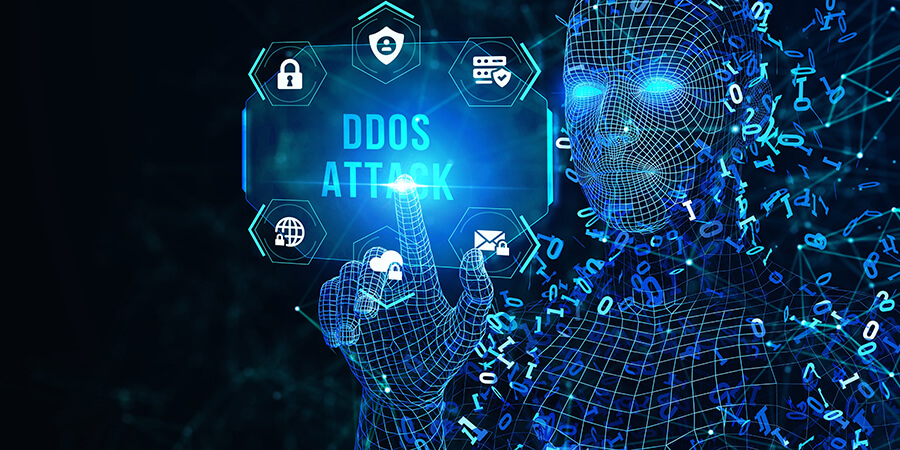

Name: **Natalia Iolchin**

Student No: **sba23303**

Assignment: **Integrated CA1 Sem 2 MSc in Data Analytics**
***

<a class="anchor" id="0.1"></a>
# Table of Contents

### [0. Introduction](#0)
* [**0.1 Data Mining Framework**](#0.0.1)
* [**0.2 Notebook Settings/Requirements**](#0.0.2)
* [**0.3. The programming paradigms**](#0.0.3)
* [**0.4. Data Visualisation basics**](#0.0.4)


<a class="anchor" id="0"></a>
## 0. Introduction
[Back to Table of Contents](#0.1)

In [ ]:
The project consists of : 

<a class="anchor" id="0.0.1"></a>
## 0.1. Data Mining Framework
[Back to Table of Contents](#0.1)

The overall approach adopted in this work combines methodologies from two prominent data mining processes: KDD (Knowledge Discovery in Databases) and SEMMA (Sample, Explore, Modify, Model, Assess). While the workflow in various sections might exhibit instances where multiple phases are intertwined or involve more sophisticated steps, the entire process consistently adheres to this established framework.

Specifically, the framework for handling data encompasses several sequential stages:

* Selection: Involves the identification and extraction of pertinent datasets or subsets from the available pool of data sources, aiming to focus on relevant information for analysis.

* Preprocessing: Encompasses data cleaning, handling missing values, standardizing formats, and other preparatory steps to ensure the data's quality and usability.

* Transformation: Entails converting and reshaping data to suit specific analysis needs or modeling requirements, such as normalization, scaling, or feature engineering.

* Exploration: Includes comprehensive exploration and examination of the data, employing visualization techniques and statistical analysis to gain insights and identify patterns or correlations.

* Modeling: Involves the creation and application of analytical models or algorithms to derive valuable predictions, classifications, or other insights from the processed data.

* Modification: Refers to iterative improvements or adjustments made to the models or data processing based on insights gained or performance evaluations.

* Assessment: Entails evaluating the models' performance, assessing the validity and accuracy of predictions or findings against predefined criteria or benchmarks.

This structured approach, encompassing these essential data-centric steps, forms the foundational framework guiding the analytical and processing stages within this work.

<a class="anchor" id="0.0.2"></a>
## 0.2. Notebook Settings/Requirements
[Back to Table of Contents](#0.1)

The command **!pip freeze** is used in Python to create a file containing a list of all installed Python packages and their respective versions in the current environment.

This file can be shared with others or used for reproducibility purposes. It allows someone else to recreate the same Python environment by running pip install -r requirements.txt, which installs all the listed packages and their specific versions. This is commonly used in Python projects to manage dependencies and ensure consistent environments across different systems.
* https://pip.pypa.io/en/stable/cli/pip_freeze/

In [5]:
!pip freeze > requirements.txt

**Used Python 3 environment comes with many helpful analytics libraries installed**

To make the code easier to understand, read and debug, all Python libraries are placed at the beginning of the code. 

To make the code cleaner, warning messages were turned off. This was done to remove unnecessary alerts and make the output easier to read.

In [1]:
# Importing necessary libraries

# data loading and manipulation
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra
import math #For mathematical operations and functions.
from pyjstat import pyjstat #JSON reading
import praw #access Reddit's data
import os #interact with the operating system enabling functionalities like file handling and directory manipulation
from collections import Counter #It is used to count occurrences of elements in an iterable or a collection.
from io import BytesIO # work with in-memory binary data
import requests # send HTTP requests
import geopandas as gpd # geodata manipulation
from tqdm import tqdm


# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import hvplot.pandas
import panel as pn
import plotly.express as px
from wordcloud import WordCloud
from PIL import Image
import matplotlib.ticker as ticker 
from matplotlib.ticker import FuncFormatter
%matplotlib inline


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras import utils
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings # Supress warnings 
warnings.filterwarnings('ignore')


**pandas:** This library is used for handling and manipulating structured data through DataFrame objects, offering functionalities for data cleaning, exploration, and analysis.
* https://pandas.pydata.org/

**numpy:** It is a fundamental library for numerical computing in Python, providing support for large, multi-dimensional arrays and matrices, as well as a collection of mathematical functions to operate on these arrays. It is commonly used for various numerical computations and linear algebra operations.
* https://numpy.org/

**Matplotlib and Seaborn:** Fundamental for static visualizations, Matplotlib forms the base for Seaborn, which offers simplified syntax and enhanced visualizations. Both libraries provide extensive plot types and customization options.
* https://matplotlib.org/
* https://seaborn.pydata.org/

**Plotly Express:** Known for interactive visualizations and dashboards, Plotly Express facilitates the creation of dynamic and interactive plots, which are useful for web-based presentations and exploratory data analysis.
* https://plotly.com/python/plotly-express/

<a class="anchor" id="0.0.3"></a>
## 0.3. The programming paradigms.
[Back to Table of Contents](#0.1)

### Common programming paradigms used throughout the project.

**Imperative Programming:** This paradigm is evident in the step-by-step sequence of commands that alter the program's state.

**Procedural Programming:** The code follows a sequence of procedures, loading data, modifying dataframes, performing calculations, and merging datasets to achieve specific tasks.

**Data Manipulation and Transformation:** Functional programming aspects are seen in data manipulation tasks using Pandas. Operations like loading data, grouping, filtering, and transforming data are performed.

**Visualization:** The code utilizes Matplotlib for generating bar and pie charts, specifying their attributes such as figure size, chart type, titles, labels, and custom colors.

<a class="anchor" id="0.0.4"></a>
## 0.4. Data Visualisation basics.
[Back to Table of Contents](#0.1)

### The most frequently applied Tufte principles in the work.

Edward Tufte's principles collectively contribute to the creation of visualizations that focus on effectively conveying the data while minimizing distractions and maximizing clarity. 

**Maximize Data-Ink Ratio:** visualizations have a considerable amount of data displayed with minimal non-data ink. The bar charts, pie chart, line plots, and map are  focused on representing the data rather than decorative elements, aligning with this principle.

**Use Clear, Detailed Labels:** The titles, axis labels, and legends in the visualizations offer clear and informative labeling, aiding in understanding the data being presented.

**Eliminate Chartjunk:** Some visualizations contain extra elements such as legends and grids, however they are generally kept to a minimum, allowing the data to be the primary focus.

**Provide Contextual Information:** Several visualizations include context-relevant information, such as the year, casualty rates, collision numbers over time, and geographical distribution, which helps viewers interpret the data.

**Respect the Integrity of the Data:** The visualizations represent the data accurately without manipulation or distortion, aligning with the principle of preserving data integrity.

Colorblind friendly palette used:
* https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps
* https://scottplot.net/cookbook/4.1/colors/#colorblind-friendly

<a class="anchor" id="1.1"></a>
## 1.1.EDA
[Back to Table of Contents](#0.1)

Dataset source: https://www.unb.ca/cic/datasets/iotdataset-2023.html

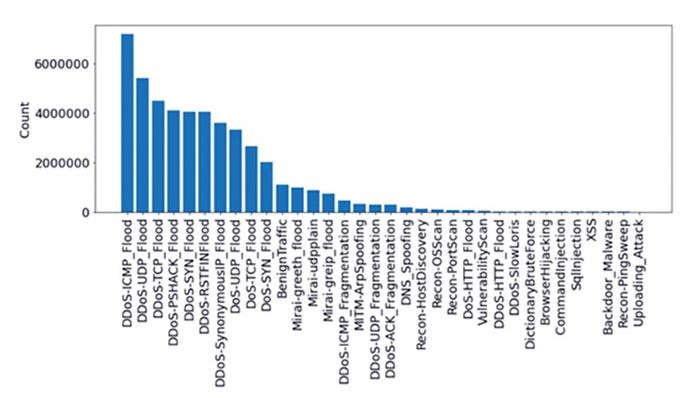

Citation
E. C. P. Neto, S. Dadkhah, R. Ferreira, A. Zohourian, R. Lu, A. A. Ghorbani. "CICIoT2023: A real-time dataset and benchmark for large-scale attacks in IoT environment," Sensor (2023) – (submitted to Journal of Sensors).

In [2]:
DATASET_DIRECTORY = 'C:/Users/dmitri.iolchin/1_NAT/Semester 2/CA1/CICIoT2023/'

### Importing Dataset

In [55]:
# List CSV files in the directory and sort them
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
df_sets.sort()

# Split the list of CSV files into training and test sets
training_sets = df_sets[:int(len(df_sets) * 0.8)]  # First 80% for training
test_sets = df_sets[int(len(df_sets) * 0.8):]      # Last 20% for testing

In [38]:
# Calculationg nr of files
len(df_sets)

20

In [43]:
# Print a message indicating the files being printed
print("First three files of the list:")

# Iterate over the first 5 files in the list
for i, name in enumerate(df_sets[:5], start=1):
    # Print the file number and name
    print(f"{i}. {name}")

First three files of the list:
1. part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
2. part-00001-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
3. part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
4. part-00003-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv
5. part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv


In [63]:
# Initialize a list to store column names for the first DataFrame
first_columns = None

# Iterate over the first 5 files and compare column names
for file in df_sets[:5]:
    # Read the column names from the current DataFrame
    df = pd.read_csv(DATASET_DIRECTORY + file)
    columns = df.columns.tolist()
    
    # If it's the first DataFrame, store its column names
    if first_columns is None:
        first_columns = columns
    # Otherwise, compare its column names with the first DataFrame
    elif columns != first_columns:
        print("Column names are different in at least one file.")
        break
else:
    print("Column names are the same for all files.")

Column names are the same for all files.


In [66]:
print(columns)
print(len(columns))

['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label']
47


In [13]:
# List of feature column names
X_columns = [
    'flow_duration', 'Header_Length', 'Protocol Type', 'Duration',
    'Rate', 'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
    'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
    'ece_flag_number', 'cwr_flag_number', 'ack_count',
    'syn_count', 'fin_count', 'urg_count', 'rst_count', 
    'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP',
    'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
    'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue',
    'Radius', 'Covariance', 'Variance', 'Weight', 
]

# Target column name
y_column = 'label'

In [68]:
#Taking 1 file for closer look
df = pd.read_csv(DATASET_DIRECTORY + df_sets[0])

In [32]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    #framename = df.dataframeName
    df = df.dropna(axis=0) # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

In [33]:
# List to store DataFrames for each CSV file
dfs = []

# Get list of CSV files
csv_files = [filename for filename in os.listdir(DATASET_DIRECTORY) if filename.endswith('.csv')]

# Iterate over each CSV file in the directory
for filename in tqdm(csv_files, desc='Processing CSV files'):
    filepath = os.path.join(DATASET_DIRECTORY, filename)
    # Read the CSV file into a DataFrame and append it to the list
    df = pd.read_csv(filepath)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)



Processing CSV files:  49%|████████████████████████████▋                              | 82/169 [03:17<03:29,  2.41s/it]


MemoryError: Unable to allocate 1.76 MiB for an array with shape (230193,) and data type float64

In [16]:
combined_df.shape

(4723822, 47)

In [9]:
for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:21<00:00,  1.36s/it]


In [21]:
d

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.020997,55.68,6.00,65.71,2.812956,2.812956,0.0,1.0,0.0,1.0,...,0.189734,54.43,8.334494e+07,9.5,10.396616,0.271579,1.843878,0.02,141.55,DDoS-RSTFINFlood
1,0.073478,13527.00,17.00,64.00,4063.759007,4063.759007,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310180e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
2,0.000000,53.46,5.94,63.36,69.756833,69.756833,0.0,0.0,0.0,0.0,...,0.273154,54.06,8.307651e+07,9.5,10.401036,0.386753,0.483918,0.16,141.55,DDoS-TCP_Flood
3,0.000000,0.00,1.00,64.00,18.147042,18.147042,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.312906e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
4,0.092882,38241.00,17.00,64.00,9940.327648,9940.327648,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.309876e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268644,0.060559,35937.00,16.84,65.91,11867.729711,11867.729711,0.0,0.0,0.0,0.0,...,0.685993,50.20,8.310312e+07,9.5,10.019984,0.971654,3.691511,0.13,141.55,DDoS-UDP_Flood
268645,0.211047,25305.50,17.00,64.00,3260.497205,3260.497205,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.309784e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
268646,0.068029,18771.00,17.00,64.00,9888.219868,9888.219868,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.301590e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
268647,0.002689,61.48,6.00,63.85,30.118128,30.118128,0.0,0.0,0.0,0.0,...,0.371910,54.12,8.307645e+07,9.5,10.402451,0.526868,1.171444,0.12,141.55,DDoS-TCP_Flood


In [11]:
d[X_columns].shape

(268649, 46)

In [21]:
d[y_column].head()

0    DDoS-RSTFINFlood
1      DDoS-UDP_Flood
2      DDoS-TCP_Flood
3     DDoS-ICMP_Flood
4      DDoS-UDP_Flood
Name: label, dtype: object

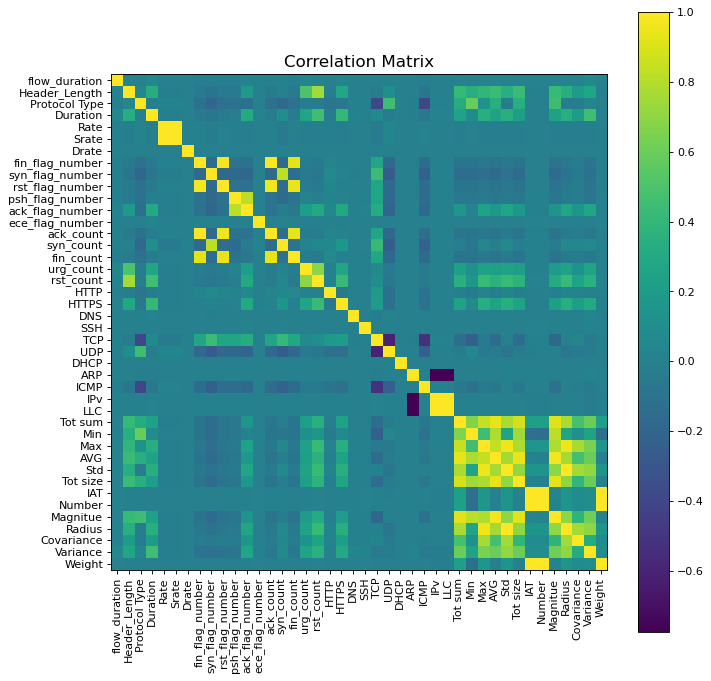

In [17]:
plotCorrelationMatrix(d[X_columns], 10)

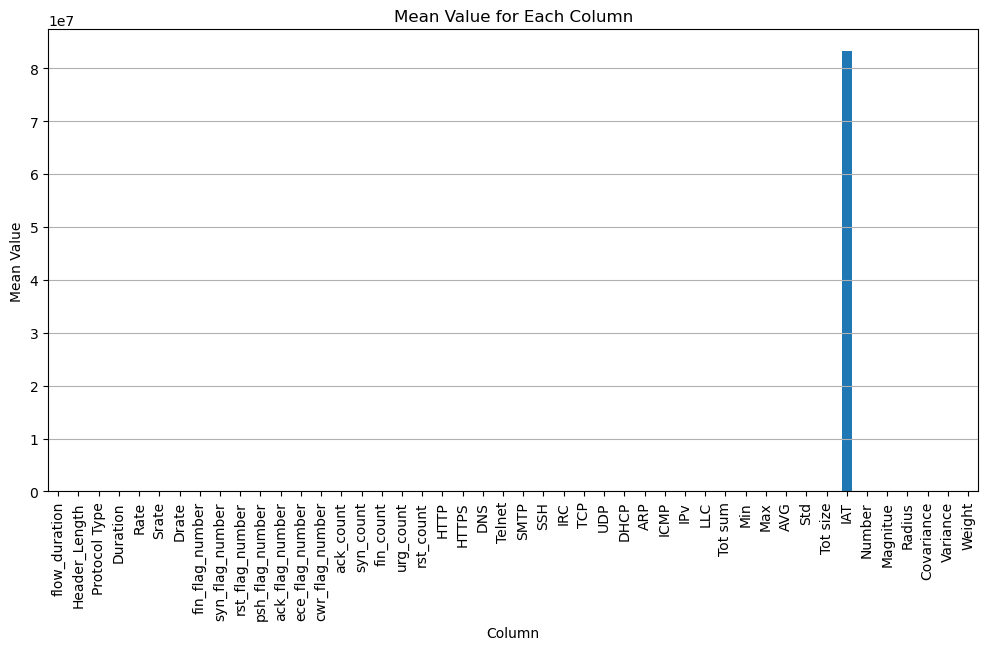

In [18]:
# Calculate the mean value for each column
mean_values = d[X_columns].mean()

# Create a bar plot of mean values
plt.figure(figsize=(12, 6))
mean_values.plot(kind='bar')
plt.title('Mean Value for Each Column')
plt.xlabel('Column')
plt.ylabel('Mean Value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines along the y-axis
plt.show()

### Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()

In [15]:
for train_set in tqdm(training_sets):
    scaler.fit(pd.read_csv(DATASET_DIRECTORY + train_set)[X_columns])

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:25<00:00,  1.61s/it]


### Classification: 34 (33+1) classes

In [10]:
train_set

'part-00004-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'

In [11]:
ML_models = [LogisticRegression(n_jobs=-1),]

ML_neams = ["LogisticRegression",]

for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    for model in (ML_models):
        model.fit(d[X_columns], d[y_column])
    del d

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:13<00:00, 38.71s/it]


In [15]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(test_sets):
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
    d_test[X_columns] = scaler.transform(d_test[X_columns])
    
    y_test += list(d_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i] = preds[i] + y_pred

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.86s/it]


In [16]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_neams[k]} (34 classes) #####")
    print('accuracy_score: ', accuracy_score(y_pred, y_test))
    print('recall_score: ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score: ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score: ', f1_score(y_pred, y_test, average='macro'))
    print()
    print()
    print()

##### LogisticRegression (34 classes) #####
accuracy_score:  0.800824752711364
recall_score:  0.5828127788785855
precision_score:  0.4806046329083576
f1_score:  0.48427002801040026





# Classification


In [17]:
dict_7classes = {}
dict_7classes['DDoS-RSTFINFlood'] = 'DDoS'
dict_7classes['DDoS-PSHACK_Flood'] = 'DDoS'
dict_7classes['DDoS-SYN_Flood'] = 'DDoS'
dict_7classes['DDoS-UDP_Flood'] = 'DDoS'
dict_7classes['DDoS-TCP_Flood'] = 'DDoS'
dict_7classes['DDoS-ICMP_Flood'] = 'DDoS'
dict_7classes['DDoS-SynonymousIP_Flood'] = 'DDoS'
dict_7classes['DDoS-ACK_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-UDP_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-ICMP_Fragmentation'] = 'DDoS'
dict_7classes['DDoS-SlowLoris'] = 'DDoS'
dict_7classes['DDoS-HTTP_Flood'] = 'DDoS'

dict_7classes['DoS-UDP_Flood'] = 'DoS'
dict_7classes['DoS-SYN_Flood'] = 'DoS'
dict_7classes['DoS-TCP_Flood'] = 'DoS'
dict_7classes['DoS-HTTP_Flood'] = 'DoS'


dict_7classes['Mirai-greeth_flood'] = 'Mirai'
dict_7classes['Mirai-greip_flood'] = 'Mirai'
dict_7classes['Mirai-udpplain'] = 'Mirai'

dict_7classes['Recon-PingSweep'] = 'Recon'
dict_7classes['Recon-OSScan'] = 'Recon'
dict_7classes['Recon-PortScan'] = 'Recon'
dict_7classes['VulnerabilityScan'] = 'Recon'
dict_7classes['Recon-HostDiscovery'] = 'Recon'

dict_7classes['DNS_Spoofing'] = 'Spoofing'
dict_7classes['MITM-ArpSpoofing'] = 'Spoofing'

dict_7classes['BenignTraffic'] = 'Benign'

dict_7classes['BrowserHijacking'] = 'Web'
dict_7classes['Backdoor_Malware'] = 'Web'
dict_7classes['XSS'] = 'Web'
dict_7classes['Uploading_Attack'] = 'Web'
dict_7classes['SqlInjection'] = 'Web'
dict_7classes['CommandInjection'] = 'Web'


dict_7classes['DictionaryBruteForce'] = 'BruteForce'

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


ML_models = [LogisticRegression(n_jobs=-1),]

ML_neams = ["LogisticRegression",]


for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    new_y = [dict_7classes[k] for k in d[y_column]]
    d[y_column] = new_y
    
    for model in (ML_models):
        model.fit(d[X_columns], d[y_column])
    del d

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:13<00:00, 14.66s/it]


In [19]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(test_sets):
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
    d_test[X_columns] = scaler.transform(d_test[X_columns])
    new_y = [dict_7classes[k] for k in d_test[y_column]]
    d_test[y_column] = new_y
    
    y_test += list(d_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i] = preds[i] + y_pred
        

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.75s/it]


In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_neams[k]} (8 classes) #####")
    print('accuracy_score = ', accuracy_score(y_pred, y_test))
    print('recall_score = ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score = ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score = ', f1_score(y_pred, y_test, average='macro'))
    print()
    print()
    print()

##### LogisticRegression (8 classes) #####
accuracy_score =  0.8322214929543579
recall_score =  0.7153359391040759
precision_score =  0.5079014443248892
f1_score =  0.5306532509904138





# Binary Classification

In [9]:
dict_2classes = {}
dict_2classes['DDoS-RSTFINFlood'] = 1
dict_2classes['DDoS-PSHACK_Flood'] = 1
dict_2classes['DDoS-SYN_Flood'] = 1
dict_2classes['DDoS-UDP_Flood'] = 1
dict_2classes['DDoS-TCP_Flood'] = 1
dict_2classes['DDoS-ICMP_Flood'] = 1
dict_2classes['DDoS-SynonymousIP_Flood'] = 1
dict_2classes['DDoS-ACK_Fragmentation'] = 1
dict_2classes['DDoS-UDP_Fragmentation'] = 1
dict_2classes['DDoS-ICMP_Fragmentation'] = 1
dict_2classes['DDoS-SlowLoris'] = 1
dict_2classes['DDoS-HTTP_Flood'] = 1

dict_2classes['DoS-UDP_Flood'] = 1
dict_2classes['DoS-SYN_Flood'] = 1
dict_2classes['DoS-TCP_Flood'] = 1
dict_2classes['DoS-HTTP_Flood'] = 1


dict_2classes['Mirai-greeth_flood'] = 1
dict_2classes['Mirai-greip_flood'] = 1
dict_2classes['Mirai-udpplain'] = 1

dict_2classes['Recon-PingSweep'] = 1
dict_2classes['Recon-OSScan'] = 1
dict_2classes['Recon-PortScan'] = 1
dict_2classes['VulnerabilityScan'] = 1
dict_2classes['Recon-HostDiscovery'] = 1

dict_2classes['DNS_Spoofing'] = 1
dict_2classes['MITM-ArpSpoofing'] = 1

dict_2classes['BenignTraffic'] = 0

dict_2classes['BrowserHijacking'] = 1
dict_2classes['Backdoor_Malware'] = 1
dict_2classes['XSS'] = 1
dict_2classes['Uploading_Attack'] = 1
dict_2classes['SqlInjection'] = 1
dict_2classes['CommandInjection'] = 1

dict_2classes['DictionaryBruteForce'] = 1

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


ML_models = [
        LogisticRegression(n_jobs=-1),
]

ML_neams = [
        "LogisticRegression",
]


for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    new_y = [dict_2classes[k] for k in d[y_column]]
    d[y_column] = new_y
    
    for model in (ML_models):
        model.fit(d[X_columns], d[y_column])
    del d

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [01:36<00:00,  6.06s/it]


In [53]:
y_test = []
preds = {i:[] for i in range(len(ML_models))}
for test_set in tqdm(test_sets):
    d_test = pd.read_csv(DATASET_DIRECTORY + test_set)
    d_test[X_columns] = scaler.transform(d_test[X_columns])
    new_y = [dict_2classes[k] for k in d_test[y_column]]
    d_test[y_column] = new_y
    
    y_test += list(d_test[y_column].values)
    
    for i in range(len(ML_models)):
        model = ML_models[i]
        y_pred = list(model.predict(d_test[X_columns]))
        preds[i] = preds[i] + y_pred

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:07<00:00,  1.77s/it]


In [54]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
for k,v in preds.items():
    y_pred = v
    print(f"##### {ML_neams[k]} (2 classes) #####")
    print('accuracy_score: ', accuracy_score(y_pred, y_test))
    print('recall_score: ', recall_score(y_pred, y_test, average='macro'))
    print('precision_score: ', precision_score(y_pred, y_test, average='macro'))
    print('f1_score: ', f1_score(y_pred, y_test, average='macro'))
    print()
    print()
    print()

##### LogisticRegression (2 classes) #####
accuracy_score:  0.9886800271635956
recall_score:  0.8848047129569212
precision_score:  0.8592887709646934
f1_score:  0.871584485284444





# NN

In [16]:
#Create first network with Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler

In [17]:
# create model
model = Sequential()
# model.add(Dense(1000, input_dim=8, activation='relu')) # 1000 neurons
# model.add(Dense(100, activation='tanh')) # 100 neurons with tanh activation function
model.add(Dense(500, input_dim=46, activation='relu')) # 500 neurons
# 93.36% accuracy with 500 neurons
# 86.99% accuracy with 100 neurons
# 85.2% accuracy with 50 neurons
# 81.38% accuracy with 10 neurons
model.add(Dense(1, activation='sigmoid')) # 1 output neuron

In [18]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
for train_set in tqdm(training_sets):
    d = pd.read_csv(DATASET_DIRECTORY + train_set)
    d[X_columns] = scaler.transform(d[X_columns])
    new_y = [dict_2classes[k] for k in d[y_column]]
    d[y_column] = new_y
    model.fit(d[X_columns], d[y_column], epochs=20, batch_size=10,  verbose=2)

  0%|                                                                                           | 0/16 [00:00<?, ?it/s]

Epoch 1/20


23869/23869 - 36s - loss: 0.0258 - accuracy: 0.9905 - 36s/epoch - 2ms/step
Epoch 2/20
23869/23869 - 35s - loss: 0.0204 - accuracy: 0.9920 - 35s/epoch - 1ms/step
Epoch 3/20
23869/23869 - 35s - loss: 0.0199 - accuracy: 0.9925 - 35s/epoch - 1ms/step
Epoch 4/20
23869/23869 - 34s - loss: 0.0204 - accuracy: 0.9926 - 34s/epoch - 1ms/step
Epoch 5/20
23869/23869 - 34s - loss: 0.0189 - accuracy: 0.9929 - 34s/epoch - 1ms/step
Epoch 6/20
23869/23869 - 34s - loss: 0.0187 - accuracy: 0.9932 - 34s/epoch - 1ms/step
Epoch 7/20
23869/23869 - 34s - loss: 0.0192 - accuracy: 0.9931 - 34s/epoch - 1ms/step
Epoch 8/20
23869/23869 - 34s - loss: 0.0183 - accuracy: 0.9931 - 34s/epoch - 1ms/step
Epoch 9/20
23869/23869 - 36s - loss: 0.0182 - accuracy: 0.9933 - 36s/epoch - 2ms/step
Epoch 10/20
23869/23869 - 36s - loss: 0.0172 - accuracy: 0.9934 - 36s/epoch - 1ms/step
Epoch 11/20
23869/23869 - 38s - loss: 0.0187 - accuracy: 0.9933 - 38s/epoch - 2ms/step
Epoch 12/20
23869/23869 - 34s - loss: 0.0168 - acc

  6%|█████                                                                           | 1/16 [11:42<2:55:38, 702.56s/it]

Epoch 1/20
21881/21881 - 36s - loss: 0.0182 - accuracy: 0.9933 - 36s/epoch - 2ms/step
Epoch 2/20
21881/21881 - 35s - loss: 0.0183 - accuracy: 0.9936 - 35s/epoch - 2ms/step
Epoch 3/20
21881/21881 - 34s - loss: 0.0174 - accuracy: 0.9936 - 34s/epoch - 2ms/step
Epoch 4/20
21881/21881 - 31s - loss: 0.0171 - accuracy: 0.9937 - 31s/epoch - 1ms/step
Epoch 5/20
21881/21881 - 31s - loss: 0.0158 - accuracy: 0.9938 - 31s/epoch - 1ms/step
Epoch 6/20
21881/21881 - 31s - loss: 0.0177 - accuracy: 0.9935 - 31s/epoch - 1ms/step
Epoch 7/20
21881/21881 - 31s - loss: 0.0164 - accuracy: 0.9938 - 31s/epoch - 1ms/step
Epoch 8/20
21881/21881 - 31s - loss: 0.0168 - accuracy: 0.9939 - 31s/epoch - 1ms/step
Epoch 9/20
21881/21881 - 31s - loss: 0.0184 - accuracy: 0.9939 - 31s/epoch - 1ms/step
Epoch 10/20
21881/21881 - 31s - loss: 0.0158 - accuracy: 0.9940 - 31s/epoch - 1ms/step
Epoch 11/20
21881/21881 - 31s - loss: 0.0180 - accuracy: 0.9940 - 31s/epoch - 1ms/step
Epoch 12/20
21881/21881 - 31s - loss: 0.0166 - accur

 12%|██████████                                                                      | 2/16 [22:10<2:33:41, 658.71s/it]

Epoch 1/20
27526/27526 - 38s - loss: 0.0180 - accuracy: 0.9935 - 38s/epoch - 1ms/step
Epoch 2/20
27526/27526 - 38s - loss: 0.0178 - accuracy: 0.9936 - 38s/epoch - 1ms/step
Epoch 3/20
27526/27526 - 38s - loss: 0.0162 - accuracy: 0.9937 - 38s/epoch - 1ms/step
Epoch 4/20
27526/27526 - 38s - loss: 0.0184 - accuracy: 0.9937 - 38s/epoch - 1ms/step
Epoch 5/20
27526/27526 - 38s - loss: 0.0179 - accuracy: 0.9936 - 38s/epoch - 1ms/step
Epoch 6/20
27526/27526 - 38s - loss: 0.0175 - accuracy: 0.9936 - 38s/epoch - 1ms/step
Epoch 7/20
27526/27526 - 38s - loss: 0.0162 - accuracy: 0.9940 - 38s/epoch - 1ms/step
Epoch 8/20
27526/27526 - 38s - loss: 0.0176 - accuracy: 0.9939 - 38s/epoch - 1ms/step
Epoch 9/20
27526/27526 - 38s - loss: 0.0168 - accuracy: 0.9939 - 38s/epoch - 1ms/step
Epoch 10/20
27526/27526 - 38s - loss: 0.0169 - accuracy: 0.9939 - 38s/epoch - 1ms/step
Epoch 11/20
27526/27526 - 38s - loss: 0.0160 - accuracy: 0.9939 - 38s/epoch - 1ms/step
Epoch 12/20
27526/27526 - 38s - loss: 0.0168 - accur

 19%|███████████████                                                                 | 3/16 [34:55<2:33:16, 707.43s/it]

Epoch 1/20
23103/23103 - 32s - loss: 0.0205 - accuracy: 0.9932 - 32s/epoch - 1ms/step
Epoch 2/20
23103/23103 - 32s - loss: 0.0200 - accuracy: 0.9937 - 32s/epoch - 1ms/step
Epoch 3/20
23103/23103 - 32s - loss: 0.0177 - accuracy: 0.9936 - 32s/epoch - 1ms/step
Epoch 4/20
23103/23103 - 32s - loss: 0.0170 - accuracy: 0.9937 - 32s/epoch - 1ms/step
Epoch 5/20
23103/23103 - 32s - loss: 0.0179 - accuracy: 0.9938 - 32s/epoch - 1ms/step
Epoch 6/20
23103/23103 - 32s - loss: 0.0168 - accuracy: 0.9938 - 32s/epoch - 1ms/step
Epoch 7/20
23103/23103 - 32s - loss: 0.0175 - accuracy: 0.9937 - 32s/epoch - 1ms/step
Epoch 8/20
23103/23103 - 32s - loss: 0.0161 - accuracy: 0.9938 - 32s/epoch - 1ms/step
Epoch 9/20
23103/23103 - 32s - loss: 0.0169 - accuracy: 0.9939 - 32s/epoch - 1ms/step
Epoch 10/20
23103/23103 - 32s - loss: 0.0180 - accuracy: 0.9938 - 32s/epoch - 1ms/step
Epoch 11/20
23103/23103 - 32s - loss: 0.0169 - accuracy: 0.9939 - 32s/epoch - 1ms/step
Epoch 12/20
23103/23103 - 32s - loss: 0.0169 - accur

 25%|████████████████████                                                            | 4/16 [45:37<2:16:17, 681.48s/it]

Epoch 1/20
22750/22750 - 31s - loss: 0.0275 - accuracy: 0.9932 - 31s/epoch - 1ms/step
Epoch 2/20
22750/22750 - 32s - loss: 0.0207 - accuracy: 0.9935 - 32s/epoch - 1ms/step
Epoch 3/20
22750/22750 - 32s - loss: 0.0226 - accuracy: 0.9937 - 32s/epoch - 1ms/step
Epoch 4/20
22750/22750 - 32s - loss: 0.0210 - accuracy: 0.9938 - 32s/epoch - 1ms/step
Epoch 5/20
22750/22750 - 31s - loss: 0.0204 - accuracy: 0.9938 - 31s/epoch - 1ms/step
Epoch 6/20
22750/22750 - 31s - loss: 0.0209 - accuracy: 0.9938 - 31s/epoch - 1ms/step
Epoch 7/20
22750/22750 - 31s - loss: 0.0196 - accuracy: 0.9939 - 31s/epoch - 1ms/step
Epoch 8/20
22750/22750 - 31s - loss: 0.0185 - accuracy: 0.9938 - 31s/epoch - 1ms/step
Epoch 9/20
22750/22750 - 31s - loss: 0.0191 - accuracy: 0.9938 - 31s/epoch - 1ms/step
Epoch 10/20
22750/22750 - 31s - loss: 0.0186 - accuracy: 0.9939 - 31s/epoch - 1ms/step
Epoch 11/20
22750/22750 - 32s - loss: 0.0179 - accuracy: 0.9939 - 32s/epoch - 1ms/step
Epoch 12/20
22750/22750 - 33s - loss: 0.0182 - accur

 31%|█████████████████████████                                                       | 5/16 [56:52<2:04:29, 679.02s/it]

Epoch 1/20
24005/24005 - 52s - loss: 0.0344 - accuracy: 0.9934 - 52s/epoch - 2ms/step
Epoch 2/20
24005/24005 - 53s - loss: 0.0273 - accuracy: 0.9937 - 53s/epoch - 2ms/step
Epoch 3/20
24005/24005 - 54s - loss: 0.0233 - accuracy: 0.9935 - 54s/epoch - 2ms/step
Epoch 4/20
24005/24005 - 53s - loss: 0.0320 - accuracy: 0.9937 - 53s/epoch - 2ms/step
Epoch 5/20
24005/24005 - 51s - loss: 0.0260 - accuracy: 0.9938 - 51s/epoch - 2ms/step
Epoch 6/20
24005/24005 - 51s - loss: 0.0214 - accuracy: 0.9938 - 51s/epoch - 2ms/step
Epoch 7/20
24005/24005 - 50s - loss: 0.0246 - accuracy: 0.9939 - 50s/epoch - 2ms/step
Epoch 8/20
24005/24005 - 50s - loss: 0.0193 - accuracy: 0.9939 - 50s/epoch - 2ms/step
Epoch 9/20
24005/24005 - 51s - loss: 0.0211 - accuracy: 0.9939 - 51s/epoch - 2ms/step
Epoch 10/20
24005/24005 - 49s - loss: 0.0294 - accuracy: 0.9939 - 49s/epoch - 2ms/step
Epoch 11/20
24005/24005 - 53s - loss: 0.0238 - accuracy: 0.9939 - 53s/epoch - 2ms/step
Epoch 12/20
24005/24005 - 58s - loss: 0.0249 - accur

 38%|█████████████████████████████▎                                                | 6/16 [1:14:35<2:14:54, 809.46s/it]

Epoch 1/20
23380/23380 - 50s - loss: 0.1478 - accuracy: 0.9934 - 50s/epoch - 2ms/step
Epoch 2/20
23380/23380 - 49s - loss: 0.1422 - accuracy: 0.9934 - 49s/epoch - 2ms/step
Epoch 3/20
23380/23380 - 49s - loss: 0.1435 - accuracy: 0.9934 - 49s/epoch - 2ms/step
Epoch 4/20
23380/23380 - 51s - loss: 0.1678 - accuracy: 0.9935 - 51s/epoch - 2ms/step
Epoch 5/20
23380/23380 - 53s - loss: 0.1012 - accuracy: 0.9937 - 53s/epoch - 2ms/step
Epoch 6/20
23380/23380 - 53s - loss: 0.1126 - accuracy: 0.9935 - 53s/epoch - 2ms/step
Epoch 7/20
23380/23380 - 51s - loss: 0.1002 - accuracy: 0.9937 - 51s/epoch - 2ms/step
Epoch 8/20
23380/23380 - 48s - loss: 0.1156 - accuracy: 0.9936 - 48s/epoch - 2ms/step
Epoch 9/20
23380/23380 - 52s - loss: 0.0698 - accuracy: 0.9937 - 52s/epoch - 2ms/step
Epoch 10/20
23380/23380 - 52s - loss: 0.0587 - accuracy: 0.9937 - 52s/epoch - 2ms/step
Epoch 11/20
23380/23380 - 53s - loss: 0.0960 - accuracy: 0.9938 - 53s/epoch - 2ms/step
Epoch 12/20
23380/23380 - 54s - loss: 0.0568 - accur

 44%|██████████████████████████████████▏                                           | 7/16 [1:31:30<2:11:30, 876.69s/it]

Epoch 1/20
22791/22791 - 46s - loss: 0.0406 - accuracy: 0.9933 - 46s/epoch - 2ms/step
Epoch 2/20
22791/22791 - 48s - loss: 0.0232 - accuracy: 0.9937 - 48s/epoch - 2ms/step
Epoch 3/20
22791/22791 - 50s - loss: 0.0464 - accuracy: 0.9936 - 50s/epoch - 2ms/step
Epoch 4/20
22791/22791 - 47s - loss: 0.0511 - accuracy: 0.9936 - 47s/epoch - 2ms/step
Epoch 5/20
22791/22791 - 46s - loss: 0.0584 - accuracy: 0.9938 - 46s/epoch - 2ms/step
Epoch 6/20
22791/22791 - 48s - loss: 0.0325 - accuracy: 0.9938 - 48s/epoch - 2ms/step
Epoch 7/20
22791/22791 - 50s - loss: 0.0459 - accuracy: 0.9938 - 50s/epoch - 2ms/step
Epoch 8/20
22791/22791 - 49s - loss: 0.0238 - accuracy: 0.9938 - 49s/epoch - 2ms/step
Epoch 9/20
22791/22791 - 49s - loss: 0.0639 - accuracy: 0.9939 - 49s/epoch - 2ms/step
Epoch 10/20
22791/22791 - 47s - loss: 0.0328 - accuracy: 0.9937 - 47s/epoch - 2ms/step
Epoch 11/20
22791/22791 - 49s - loss: 0.0648 - accuracy: 0.9940 - 49s/epoch - 2ms/step
Epoch 12/20
22791/22791 - 49s - loss: 0.0319 - accur

 50%|███████████████████████████████████████                                       | 8/16 [1:47:13<1:59:42, 897.81s/it]

Epoch 1/20
24633/24633 - 34s - loss: 0.0440 - accuracy: 0.9937 - 34s/epoch - 1ms/step
Epoch 2/20
24633/24633 - 34s - loss: 0.0341 - accuracy: 0.9937 - 34s/epoch - 1ms/step
Epoch 3/20
24633/24633 - 34s - loss: 0.0428 - accuracy: 0.9938 - 34s/epoch - 1ms/step
Epoch 4/20
24633/24633 - 34s - loss: 0.0339 - accuracy: 0.9939 - 34s/epoch - 1ms/step
Epoch 5/20
24633/24633 - 34s - loss: 0.0375 - accuracy: 0.9938 - 34s/epoch - 1ms/step
Epoch 6/20
24633/24633 - 34s - loss: 0.0358 - accuracy: 0.9939 - 34s/epoch - 1ms/step
Epoch 7/20
24633/24633 - 34s - loss: 0.0295 - accuracy: 0.9940 - 34s/epoch - 1ms/step
Epoch 8/20
24633/24633 - 34s - loss: 0.0333 - accuracy: 0.9941 - 34s/epoch - 1ms/step
Epoch 9/20
24633/24633 - 34s - loss: 0.0484 - accuracy: 0.9939 - 34s/epoch - 1ms/step
Epoch 10/20
24633/24633 - 34s - loss: 0.0444 - accuracy: 0.9940 - 34s/epoch - 1ms/step
Epoch 11/20
24633/24633 - 34s - loss: 0.0265 - accuracy: 0.9941 - 34s/epoch - 1ms/step
Epoch 12/20
24633/24633 - 34s - loss: 0.0331 - accur

 56%|███████████████████████████████████████████▉                                  | 9/16 [1:58:40<1:37:04, 832.03s/it]

Epoch 1/20
22762/22762 - 32s - loss: 0.1218 - accuracy: 0.9934 - 32s/epoch - 1ms/step
Epoch 2/20
22762/22762 - 31s - loss: 0.0275 - accuracy: 0.9934 - 31s/epoch - 1ms/step
Epoch 3/20
22762/22762 - 32s - loss: 0.0246 - accuracy: 0.9937 - 32s/epoch - 1ms/step
Epoch 4/20
22762/22762 - 31s - loss: 0.0258 - accuracy: 0.9937 - 31s/epoch - 1ms/step
Epoch 5/20
22762/22762 - 31s - loss: 0.0240 - accuracy: 0.9936 - 31s/epoch - 1ms/step
Epoch 6/20
22762/22762 - 32s - loss: 0.0318 - accuracy: 0.9937 - 32s/epoch - 1ms/step
Epoch 7/20
22762/22762 - 31s - loss: 0.0205 - accuracy: 0.9938 - 31s/epoch - 1ms/step
Epoch 8/20
22762/22762 - 31s - loss: 0.0261 - accuracy: 0.9938 - 31s/epoch - 1ms/step
Epoch 9/20
22762/22762 - 31s - loss: 0.0334 - accuracy: 0.9938 - 31s/epoch - 1ms/step
Epoch 10/20
22762/22762 - 32s - loss: 0.0185 - accuracy: 0.9939 - 32s/epoch - 1ms/step
Epoch 11/20
22762/22762 - 31s - loss: 0.0233 - accuracy: 0.9939 - 31s/epoch - 1ms/step
Epoch 12/20
22762/22762 - 31s - loss: 0.0252 - accur

 62%|████████████████████████████████████████████████▏                            | 10/16 [2:09:16<1:17:09, 771.65s/it]

Epoch 1/20
25140/25140 - 35s - loss: 0.0286 - accuracy: 0.9934 - 35s/epoch - 1ms/step
Epoch 2/20
25140/25140 - 35s - loss: 0.0306 - accuracy: 0.9936 - 35s/epoch - 1ms/step
Epoch 3/20
25140/25140 - 35s - loss: 0.0229 - accuracy: 0.9936 - 35s/epoch - 1ms/step
Epoch 4/20
25140/25140 - 35s - loss: 0.0302 - accuracy: 0.9937 - 35s/epoch - 1ms/step
Epoch 5/20
25140/25140 - 35s - loss: 0.0240 - accuracy: 0.9938 - 35s/epoch - 1ms/step
Epoch 6/20
25140/25140 - 35s - loss: 0.0175 - accuracy: 0.9939 - 35s/epoch - 1ms/step
Epoch 7/20
25140/25140 - 35s - loss: 0.0245 - accuracy: 0.9939 - 35s/epoch - 1ms/step
Epoch 8/20
25140/25140 - 35s - loss: 0.0191 - accuracy: 0.9939 - 35s/epoch - 1ms/step
Epoch 9/20
25140/25140 - 35s - loss: 0.0167 - accuracy: 0.9939 - 35s/epoch - 1ms/step
Epoch 10/20
25140/25140 - 35s - loss: 0.0187 - accuracy: 0.9939 - 35s/epoch - 1ms/step
Epoch 11/20
25140/25140 - 35s - loss: 0.0171 - accuracy: 0.9940 - 35s/epoch - 1ms/step
Epoch 12/20
25140/25140 - 35s - loss: 0.0165 - accur

 69%|████████████████████████████████████████████████████▉                        | 11/16 [2:20:56<1:02:27, 749.49s/it]

Epoch 1/20
22193/22193 - 31s - loss: 0.0628 - accuracy: 0.9936 - 31s/epoch - 1ms/step
Epoch 2/20
22193/22193 - 31s - loss: 0.0678 - accuracy: 0.9937 - 31s/epoch - 1ms/step
Epoch 3/20
22193/22193 - 31s - loss: 0.0774 - accuracy: 0.9939 - 31s/epoch - 1ms/step
Epoch 4/20
22193/22193 - 31s - loss: 0.0613 - accuracy: 0.9939 - 31s/epoch - 1ms/step
Epoch 5/20
22193/22193 - 31s - loss: 0.0508 - accuracy: 0.9938 - 31s/epoch - 1ms/step
Epoch 6/20
22193/22193 - 31s - loss: 0.0517 - accuracy: 0.9940 - 31s/epoch - 1ms/step
Epoch 7/20
22193/22193 - 31s - loss: 0.0839 - accuracy: 0.9939 - 31s/epoch - 1ms/step
Epoch 8/20
22193/22193 - 31s - loss: 0.0556 - accuracy: 0.9940 - 31s/epoch - 1ms/step
Epoch 9/20
22193/22193 - 31s - loss: 0.0568 - accuracy: 0.9941 - 31s/epoch - 1ms/step
Epoch 10/20
22193/22193 - 31s - loss: 0.1200 - accuracy: 0.9940 - 31s/epoch - 1ms/step
Epoch 11/20
22193/22193 - 31s - loss: 0.1277 - accuracy: 0.9940 - 31s/epoch - 1ms/step
Epoch 12/20
22193/22193 - 31s - loss: 0.0462 - accur

 75%|███████████████████████████████████████████████████████████▎                   | 12/16 [2:31:13<47:17, 709.35s/it]

Epoch 1/20
23848/23848 - 33s - loss: 0.0333 - accuracy: 0.9938 - 33s/epoch - 1ms/step
Epoch 2/20
23848/23848 - 33s - loss: 0.0351 - accuracy: 0.9937 - 33s/epoch - 1ms/step
Epoch 3/20
23848/23848 - 33s - loss: 0.0287 - accuracy: 0.9938 - 33s/epoch - 1ms/step
Epoch 4/20
23848/23848 - 33s - loss: 0.0309 - accuracy: 0.9938 - 33s/epoch - 1ms/step
Epoch 5/20
23848/23848 - 33s - loss: 0.0356 - accuracy: 0.9938 - 33s/epoch - 1ms/step
Epoch 6/20
23848/23848 - 33s - loss: 0.0328 - accuracy: 0.9938 - 33s/epoch - 1ms/step
Epoch 7/20
23848/23848 - 33s - loss: 0.0243 - accuracy: 0.9939 - 33s/epoch - 1ms/step
Epoch 8/20
23848/23848 - 33s - loss: 0.0315 - accuracy: 0.9939 - 33s/epoch - 1ms/step
Epoch 9/20
23848/23848 - 33s - loss: 0.0303 - accuracy: 0.9939 - 33s/epoch - 1ms/step
Epoch 10/20
23848/23848 - 33s - loss: 0.0316 - accuracy: 0.9941 - 33s/epoch - 1ms/step
Epoch 11/20
23848/23848 - 33s - loss: 0.0213 - accuracy: 0.9940 - 33s/epoch - 1ms/step
Epoch 12/20
23848/23848 - 33s - loss: 0.0277 - accur

 81%|████████████████████████████████████████████████████████████████▏              | 13/16 [2:42:11<34:40, 693.60s/it]

Epoch 1/20
23877/23877 - 33s - loss: 0.2062 - accuracy: 0.9935 - 33s/epoch - 1ms/step
Epoch 2/20
23877/23877 - 33s - loss: 0.1028 - accuracy: 0.9936 - 33s/epoch - 1ms/step
Epoch 3/20
23877/23877 - 33s - loss: 0.2570 - accuracy: 0.9937 - 33s/epoch - 1ms/step
Epoch 4/20
23877/23877 - 33s - loss: 0.1453 - accuracy: 0.9937 - 33s/epoch - 1ms/step
Epoch 5/20
23877/23877 - 33s - loss: 0.0955 - accuracy: 0.9938 - 33s/epoch - 1ms/step
Epoch 6/20
23877/23877 - 33s - loss: 0.1653 - accuracy: 0.9938 - 33s/epoch - 1ms/step
Epoch 7/20
23877/23877 - 33s - loss: 0.2656 - accuracy: 0.9938 - 33s/epoch - 1ms/step
Epoch 8/20
23877/23877 - 33s - loss: 0.1441 - accuracy: 0.9937 - 33s/epoch - 1ms/step
Epoch 9/20
23877/23877 - 33s - loss: 0.0767 - accuracy: 0.9937 - 33s/epoch - 1ms/step
Epoch 10/20
23877/23877 - 33s - loss: 0.1545 - accuracy: 0.9938 - 33s/epoch - 1ms/step
Epoch 11/20
23877/23877 - 33s - loss: 0.0975 - accuracy: 0.9938 - 33s/epoch - 1ms/step
Epoch 12/20
23877/23877 - 33s - loss: 0.1361 - accur

 88%|█████████████████████████████████████████████████████████████████████▏         | 14/16 [2:53:11<22:47, 683.64s/it]

Epoch 1/20
21584/21584 - 30s - loss: 0.1161 - accuracy: 0.9936 - 30s/epoch - 1ms/step
Epoch 2/20
21584/21584 - 30s - loss: 0.1248 - accuracy: 0.9937 - 30s/epoch - 1ms/step
Epoch 3/20
21584/21584 - 30s - loss: 0.1398 - accuracy: 0.9939 - 30s/epoch - 1ms/step
Epoch 4/20
21584/21584 - 30s - loss: 0.1005 - accuracy: 0.9939 - 30s/epoch - 1ms/step
Epoch 5/20
21584/21584 - 30s - loss: 0.0914 - accuracy: 0.9938 - 30s/epoch - 1ms/step
Epoch 6/20
21584/21584 - 30s - loss: 0.1140 - accuracy: 0.9940 - 30s/epoch - 1ms/step
Epoch 7/20
21584/21584 - 31s - loss: 0.1137 - accuracy: 0.9940 - 31s/epoch - 1ms/step
Epoch 8/20
21584/21584 - 30s - loss: 0.0738 - accuracy: 0.9939 - 30s/epoch - 1ms/step
Epoch 9/20
21584/21584 - 30s - loss: 0.0942 - accuracy: 0.9940 - 30s/epoch - 1ms/step
Epoch 10/20
21584/21584 - 30s - loss: 0.0909 - accuracy: 0.9941 - 30s/epoch - 1ms/step
Epoch 11/20
21584/21584 - 30s - loss: 0.0531 - accuracy: 0.9939 - 30s/epoch - 1ms/step
Epoch 12/20
21584/21584 - 30s - loss: 0.0837 - accur

 94%|██████████████████████████████████████████████████████████████████████████     | 15/16 [3:03:09<10:57, 657.84s/it]

Epoch 1/20
26865/26865 - 37s - loss: 0.0995 - accuracy: 0.9933 - 37s/epoch - 1ms/step
Epoch 2/20
26865/26865 - 37s - loss: 0.0488 - accuracy: 0.9933 - 37s/epoch - 1ms/step
Epoch 3/20
26865/26865 - 37s - loss: 0.0311 - accuracy: 0.9935 - 37s/epoch - 1ms/step
Epoch 4/20
26865/26865 - 37s - loss: 0.0329 - accuracy: 0.9937 - 37s/epoch - 1ms/step
Epoch 5/20
26865/26865 - 37s - loss: 0.0302 - accuracy: 0.9934 - 37s/epoch - 1ms/step
Epoch 6/20
26865/26865 - 37s - loss: 0.0325 - accuracy: 0.9936 - 37s/epoch - 1ms/step
Epoch 7/20
26865/26865 - 37s - loss: 0.0324 - accuracy: 0.9937 - 37s/epoch - 1ms/step
Epoch 8/20
26865/26865 - 37s - loss: 0.0352 - accuracy: 0.9937 - 37s/epoch - 1ms/step
Epoch 9/20
26865/26865 - 37s - loss: 0.0290 - accuracy: 0.9938 - 37s/epoch - 1ms/step
Epoch 10/20
26865/26865 - 37s - loss: 0.0350 - accuracy: 0.9937 - 37s/epoch - 1ms/step
Epoch 11/20
26865/26865 - 37s - loss: 0.0314 - accuracy: 0.9937 - 37s/epoch - 1ms/step
Epoch 12/20
26865/26865 - 37s - loss: 0.0239 - accur

100%|███████████████████████████████████████████████████████████████████████████████| 16/16 [3:15:34<00:00, 733.40s/it]


In [35]:
# evaluate the model
scores = model.evaluate(d[X_columns], d[y_column])
print("%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

8396/8396 [==============================] - 12s 1ms/step - loss: 0.5423 - accuracy: 0.9931
loss: 54.23%
accuracy: 99.31%


In [25]:
d[y_column].shape

(268649,)

# Random Forest Classifier

In [19]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(train[['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes',
       'Fwd Act Data Packets', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min']])

In [20]:
numerical_columns = ['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes',
       'Fwd Act Data Packets', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min']

In [21]:
train[numerical_columns] = min_max_scaler.transform(train[numerical_columns])

In [30]:
model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features= None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None
)

hyperparameters = {
    'n_estimators': [50, 75, 100, 125]
}

In [31]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(
    estimator=model,
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [32]:
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_features=None),
             n_jobs=-1, param_grid={'n_estimators': [50, 75, 100, 125]},
             verbose=1)

In [33]:
print("Accuracy score on Validation set: \n")
print(clf.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(clf.best_params_)
print("---------------")
print(clf.best_estimator_)

Accuracy score on Validation set: 

0.9993773989512714
---------------
Best performing hyperparameters on Validation set: 
{'n_estimators': 50}
---------------
RandomForestClassifier(max_features=None, n_estimators=50)


In [34]:
model = clf.best_estimator_

In [35]:
predictions = model.predict(X_test)

In [36]:
print(accuracy_score(y_test, predictions))

0.999490000927271


<Axes: >

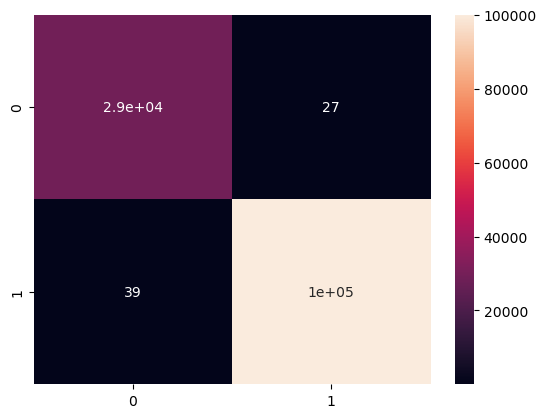

In [37]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# NN (EarlyStopping)

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [41]:
neuralNetModel = keras.Sequential([
    layers.InputLayer(input_shape=(77,)),
       
    layers.BatchNormalization(renorm=True),
    layers.Dense(128, activation='relu'),
    layers.Dropout(rate = 0.3),
    layers.BatchNormalization(renorm=True),
    layers.Dense(64, activation='relu'),
    layers.Dropout(rate = 0.3),
    layers.BatchNormalization(renorm=True),
    layers.Dense(32, activation='relu'),
    layers.Dropout(rate = 0.3),
    layers.Dense(1, activation='sigmoid'),
])

neuralNetModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_3 (Bat  (None, 77)                539       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 128)               9984      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_4 (Bat  (None, 128)               896       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)               

Epoch 1/50


1180/1180 [==============================] - 10s 5ms/step - loss: 0.1177 - binary_accuracy: 0.9548
Epoch 2/50
1180/1180 [==============================] - 7s 6ms/step - loss: 0.0214 - binary_accuracy: 0.9952
Epoch 3/50
1180/1180 [==============================] - 7s 6ms/step - loss: 0.0180 - binary_accuracy: 0.9957
Epoch 4/50
1180/1180 [==============================] - 7s 6ms/step - loss: 0.0158 - binary_accuracy: 0.9960
Epoch 5/50
1180/1180 [==============================] - 7s 6ms/step - loss: 0.0150 - binary_accuracy: 0.9963
Epoch 6/50
1180/1180 [==============================] - 7s 6ms/step - loss: 0.0145 - binary_accuracy: 0.9963
Epoch 7/50
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0140 - binary_accuracy: 0.9964
Epoch 8/50
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0133 - binary_accuracy: 0.9965
Epoch 9/50
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0129 - binary_accuracy: 0.9965
Epoch 10/50
1180

Epoch 24/50
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0099 - binary_accuracy: 0.9972
Epoch 25/50
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0100 - binary_accuracy: 0.9972
Epoch 26/50
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0097 - binary_accuracy: 0.9973
Epoch 27/50
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0098 - binary_accuracy: 0.9972
Epoch 28/50
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0097 - binary_accuracy: 0.9972
Epoch 29/50
1180/1180 [==============================] - 7s 6ms/step - loss: 0.0096 - binary_accuracy: 0.9972
Epoch 30/50
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0094 - binary_accuracy: 0.9973
Epoch 31/50
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0095 - binary_accuracy: 0.9972
Epoch 32/50
1180/1180 [==============================] - 6s 5ms/step - loss: 0.0094 - binary_accuracy: 0.9974
Epoch 33/5

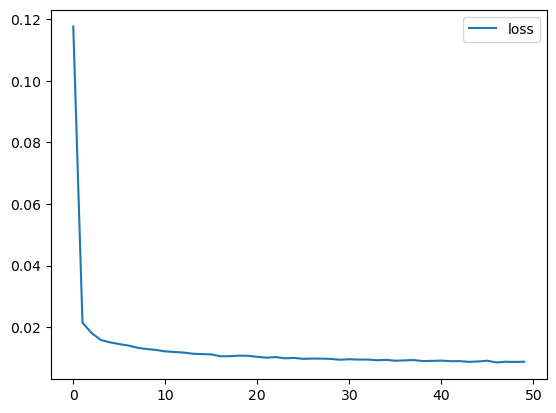

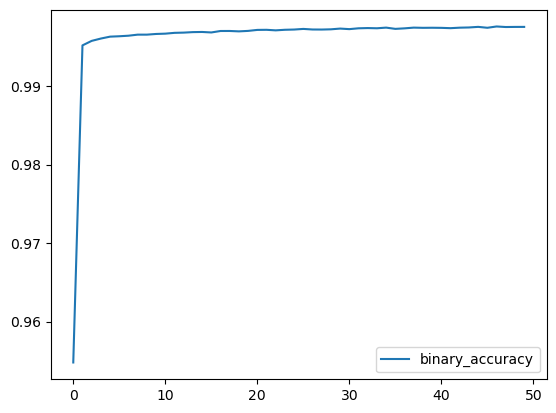

In [42]:
optimizer = tf.keras.optimizers.Adam(epsilon=0.01)

from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,
    patience = 5,
    restore_best_weights = True
)

neuralNetModel.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = neuralNetModel.fit(
    X_train, y_train,
    epochs=50,
    batch_size = 256,
    callbacks=[early_stopping]
)

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss']].plot()
history_frame.loc[:, ['binary_accuracy']].plot();

In [43]:
predictions=(neuralNetModel.predict(X_test) > 0.5).astype("int32")

4045/4045 [==============================] - 7s 2ms/step


In [44]:
print(accuracy_score(y_test, predictions))

0.9977977312768522


<Axes: >

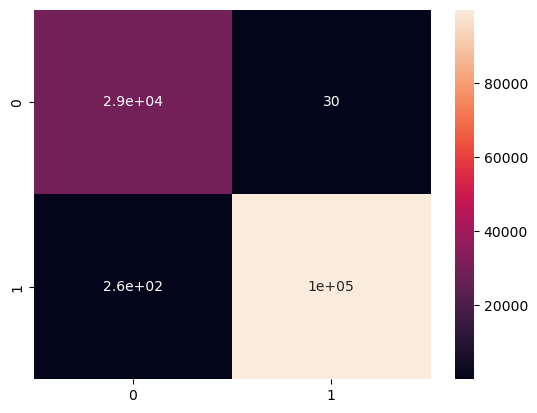

In [45]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

# Isolation Forest

In [51]:
train, test = train_test_split(dfc, test_size=0.3, random_state=12)

In [52]:
# display columns
train.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [53]:
# feature info
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301959 entries, 109378 to 235163
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  301959 non-null  int64  
 1   Flow Duration             301959 non-null  int64  
 2   Total Fwd Packets         301959 non-null  int64  
 3   Total Backward Packets    301959 non-null  int64  
 4   Fwd Packets Length Total  301959 non-null  float64
 5   Bwd Packets Length Total  301959 non-null  float64
 6   Fwd Packet Length Max     301959 non-null  float64
 7   Fwd Packet Length Min     301959 non-null  float64
 8   Fwd Packet Length Mean    301959 non-null  float64
 9   Fwd Packet Length Std     301959 non-null  float64
 10  Bwd Packet Length Max     301959 non-null  float64
 11  Bwd Packet Length Min     301959 non-null  float64
 12  Bwd Packet Length Mean    301959 non-null  float64
 13  Bwd Packet Length Std     301959 non-null  f

In [54]:
min_max_scaler = MinMaxScaler().fit(train[['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes',
       'Fwd Act Data Packets', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min']])

In [55]:
numerical_columns = ['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Avg Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate',
       'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate',
       'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
       'Subflow Bwd Bytes', 'Init Fwd Win Bytes', 'Init Bwd Win Bytes',
       'Fwd Act Data Packets', 'Fwd Seg Size Min', 'Active Mean', 'Active Std',
       'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max',
       'Idle Min']

In [56]:
train[numerical_columns] = min_max_scaler.transform(train[numerical_columns])

In [57]:
train

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class_label
109378,1.000000,0.000000e+00,0.000012,0.000000,1.320546e-04,0.000000e+00,0.031382,0.473017,0.334296,0.000000,...,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1
590,1.000000,8.703175e-04,0.000035,0.000000,9.419369e-05,0.000000e+00,0.012111,0.154857,0.119226,0.015333,...,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1
188987,1.000000,5.259137e-02,0.000058,0.000000,2.027981e-04,0.000000e+00,0.016065,0.242140,0.171128,0.000000,...,0.245355,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1
51880,0.352941,4.963953e-01,0.000127,0.000189,4.716235e-06,6.161271e-07,0.000187,0.002816,0.001990,0.000000,...,0.999999,0.000004,0.000003,0.000003,5.178165e-08,0.099927,0.055716,0.144688,0.068797,1
377042,1.000000,8.651757e-05,0.000081,0.000000,2.211390e-04,0.000000e+00,0.013699,0.172689,0.139953,0.015003,...,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36482,0.352941,8.298462e-03,0.000035,0.000000,1.572078e-06,0.000000e+00,0.000187,0.002816,0.001990,0.000000,...,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1
40177,0.352941,8.416755e-07,0.000012,0.000063,7.860391e-07,2.053757e-07,0.000187,0.002816,0.001990,0.000000,...,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1
412925,1.000000,7.833416e-07,0.000127,0.000000,3.175598e-04,0.000000e+00,0.013699,0.105115,0.133984,0.037846,...,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1
255366,1.000000,2.498928e-02,0.000035,0.000000,1.351987e-04,0.000000e+00,0.016065,0.242140,0.171128,0.000000,...,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1


In [58]:
train.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class_label
count,301959.000000,301959.000000,301959.000000,301959.000000,301959.000000,301959.000000,301959.000000,301959.000000,301959.000000,301959.000000,...,301959.000000,301959.000000,301959.000000,301959.000000,301959.000000,301959.000000,301959.000000,301959.000000,301959.000000,301959.000000
mean,0.820301,0.069861,0.000269,0.000079,0.000618,0.000030,0.011125,0.138151,0.107701,0.009127,...,0.983412,0.001762,0.001193,0.001487,0.000987,0.020501,0.007121,0.024853,0.016694,0.773181
std,0.292266,0.176875,0.002673,0.002063,0.002561,0.002103,0.010024,0.128107,0.088994,0.031956,...,0.110666,0.016610,0.010475,0.011450,0.014511,0.066338,0.028626,0.075752,0.060772,0.418775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352941,0.000007,0.000035,0.000000,0.000005,0.000000,0.001152,0.002816,0.010613,0.000000,...,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000375,0.000035,0.000000,0.000135,0.000000,0.013699,0.154857,0.141943,0.000000,...,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.025021,0.000173,0.000063,0.000338,0.000000,0.016065,0.242140,0.171128,0.000000,...,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301959 entries, 109378 to 235163
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  301959 non-null  float64
 1   Flow Duration             301959 non-null  float64
 2   Total Fwd Packets         301959 non-null  float64
 3   Total Backward Packets    301959 non-null  float64
 4   Fwd Packets Length Total  301959 non-null  float64
 5   Bwd Packets Length Total  301959 non-null  float64
 6   Fwd Packet Length Max     301959 non-null  float64
 7   Fwd Packet Length Min     301959 non-null  float64
 8   Fwd Packet Length Mean    301959 non-null  float64
 9   Fwd Packet Length Std     301959 non-null  float64
 10  Bwd Packet Length Max     301959 non-null  float64
 11  Bwd Packet Length Min     301959 non-null  float64
 12  Bwd Packet Length Mean    301959 non-null  float64
 13  Bwd Packet Length Std     301959 non-null  f

In [60]:
test[numerical_columns] = min_max_scaler.transform(test[numerical_columns])

In [61]:
test[numerical_columns]

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
58451,0.352941,0.331299,0.000104,0.000189,0.000004,6.161271e-07,0.000187,0.002816,0.001990,0.000000,...,0.000480,0.999999,0.000005,0.000001,0.000002,4.142532e-06,0.083366,0.038741,0.104278,0.056993
167951,1.000000,0.025001,0.000035,0.000000,0.000135,0.000000e+00,0.016065,0.242140,0.171128,0.000000,...,0.000160,0.245355,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
342832,1.000000,0.000055,0.000035,0.000000,0.000115,0.000000e+00,0.013699,0.206476,0.145923,0.000000,...,0.000160,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
78640,0.352941,0.983594,0.000496,0.001451,0.000338,2.133511e-04,0.019334,0.000000,0.038847,0.089468,...,0.001172,0.999999,0.013269,0.011356,0.009393,4.390359e-03,0.492690,0.003596,0.494174,0.491205
237684,1.000000,0.026014,0.000035,0.000000,0.000135,0.000000e+00,0.016065,0.242140,0.171128,0.000000,...,0.000160,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270920,1.000000,0.000907,0.000035,0.000000,0.000092,0.000000e+00,0.011488,0.154857,0.115909,0.010136,...,0.000160,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
57219,0.352941,0.558339,0.000127,0.000063,0.000005,2.053757e-07,0.000187,0.002816,0.001990,0.000000,...,0.000586,0.999999,0.000002,0.000002,0.000002,5.178165e-08,0.112398,0.030981,0.126745,0.084814
272304,1.000000,0.000900,0.000035,0.000000,0.000092,0.000000e+00,0.011488,0.154857,0.115909,0.010136,...,0.000160,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
316308,1.000000,0.000005,0.000150,0.000000,0.000356,0.000000e+00,0.013699,0.037541,0.128867,0.058846,...,0.000693,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


In [62]:
test.describe()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class_label
count,129412.000000,129412.000000,129412.000000,129412.000000,129412.000000,129412.000000,129412.000000,129412.000000,129412.000000,129412.000000,...,129412.000000,129412.000000,129412.000000,129412.000000,129412.000000,129412.000000,129412.000000,129412.000000,129412.000000,129412.000000
mean,0.821001,0.070461,0.000263,0.000075,0.000615,0.000024,0.011140,0.138655,0.107884,0.009026,...,0.983895,0.001708,0.001219,0.001476,0.000922,0.020663,0.007245,0.025081,0.016795,0.773275
std,0.291911,0.178016,0.000599,0.000780,0.001295,0.000858,0.009820,0.128579,0.089253,0.031887,...,0.109075,0.016875,0.010315,0.011227,0.015017,0.066484,0.029215,0.076148,0.060782,0.418715
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.352941,0.000007,0.000035,0.000000,0.000005,0.000000,0.001152,0.002816,0.010613,0.000000,...,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000359,0.000035,0.000000,0.000135,0.000000,0.013699,0.154857,0.142153,0.000000,...,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.025022,0.000173,0.000063,0.000346,0.000000,0.016065,0.242140,0.171128,0.000000,...,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,0.999994,0.099083,0.125804,0.011529,0.188154,0.112858,0.970906,0.884189,0.599983,...,1.047747,2.097571,0.498189,0.889569,2.097571,0.986158,0.948127,0.986158,0.986158,1.000000


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129412 entries, 58451 to 321883
Data columns (total 78 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Protocol                  129412 non-null  float64
 1   Flow Duration             129412 non-null  float64
 2   Total Fwd Packets         129412 non-null  float64
 3   Total Backward Packets    129412 non-null  float64
 4   Fwd Packets Length Total  129412 non-null  float64
 5   Bwd Packets Length Total  129412 non-null  float64
 6   Fwd Packet Length Max     129412 non-null  float64
 7   Fwd Packet Length Min     129412 non-null  float64
 8   Fwd Packet Length Mean    129412 non-null  float64
 9   Fwd Packet Length Std     129412 non-null  float64
 10  Bwd Packet Length Max     129412 non-null  float64
 11  Bwd Packet Length Min     129412 non-null  float64
 12  Bwd Packet Length Mean    129412 non-null  float64
 13  Bwd Packet Length Std     129412 non-null  fl

In [64]:
y_train = train.pop("Class_label")
X_train = train.values
y_test = test.pop("Class_label")
X_test = test.values


y_test

58451     1
167951    1
342832    1
78640     0
237684    1
         ..
270920    1
57219     1
272304    1
316308    1
321883    1
Name: Class_label, Length: 129412, dtype: int64

In [65]:
y_train

109378    1
590       1
188987    1
51880     1
377042    1
         ..
36482     1
40177     1
412925    1
255366    1
235163    1
Name: Class_label, Length: 301959, dtype: int64

In [66]:
def freq_count(data):
    mp = dict();
    for i in data:
        if i in mp:
            mp[i] = mp[i]+1
        else:
            mp[i] = 1
    return mp

y_train[y_train == 1] = -1
y_train[y_train == 0] = 1
print(freq_count(y_train))

y_test[y_test == 1] = -1
y_test[y_test == 0] = 1
freq_count(y_test)

{-1: 233469, 1: 68490}


{-1: 100071, 1: 29341}

In [67]:
from sklearn.ensemble import IsolationForest
iFM = IsolationForest(
    n_estimators = 100,
    max_samples = "auto",
    random_state = 42,
    warm_start = False
)

In [68]:
hyperparameters = {
    'n_estimators': [50, 75, 100, 125, 150]
}

isolationForestCV = GridSearchCV(
    estimator=iFM,
    scoring = 'accuracy',
    param_grid=hyperparameters,
    cv=5,
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

In [69]:
isolationForestCV.fit(X = X_train, y = y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=IsolationForest(random_state=42), n_jobs=-1,
             param_grid={'n_estimators': [50, 75, 100, 125, 150]},
             scoring='accuracy', verbose=1)

In [70]:
print("Accuracy score on Validation set: \n")
print(isolationForestCV.best_score_ )
print("---------------")
print("Best performing hyperparameters on Validation set: ")
print(isolationForestCV.best_params_)
print("---------------")
print(isolationForestCV.best_estimator_)

Accuracy score on Validation set: 

0.20105708048279952
---------------
Best performing hyperparameters on Validation set: 
{'n_estimators': 50}
---------------
IsolationForest(n_estimators=50, random_state=42)


In [71]:
model = isolationForestCV.best_estimator_

In [72]:
model

IsolationForest(n_estimators=50, random_state=42)

In [73]:
predictions = model.predict(X_test)
freq_count(predictions)

{1: 122057, -1: 7355}

In [74]:
print(accuracy_score(y_test, predictions))

0.19695236917751058


In [75]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
cf_matrix

array([[ 1751, 98320],
       [ 5604, 23737]], dtype=int64)

<Axes: >

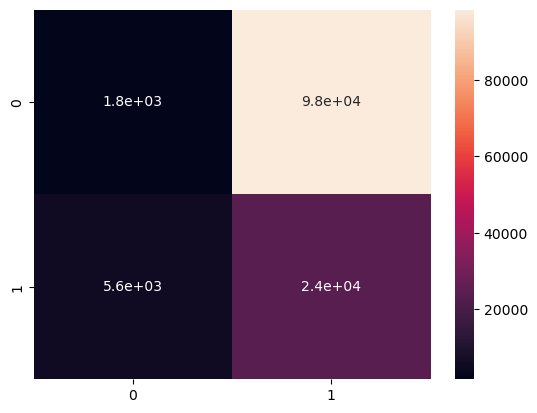

In [76]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)